# Дипломный проект. Специализация "Data Scientist"

### Тема: Машинное обучение для оптимизации энергозатрат

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [32]:
df = pd.read_csv('data/modelling_data.csv', index_col='Timestamp', parse_dates=['Timestamp'])
df.head()


,selenium,carbon,manganese,silicium,dinitrogen,temperature_zone1,temperature_zone2,temperature_zone3,temperature_zone4,temperature_zone5,temperature_zone6,oxygen_zone123,oxygen_zone456,hydrogen_zone123,hydrogen_zone456,TARGET
Timestamp,,,,,,,,,,,,,,,,
2022-05-05 00:00:00,0.598,0.0415,0.1598,31.097,76,1211.343319,1221.089337,1179.652435,1240.006479,1241.398137,1199.302872,2.906495,4.738462,5.265036,7.978662,0
2022-05-05 00:00:15,0.598,0.0415,0.1598,31.097,76,1210.487065,1219.840389,1179.382949,1239.457432,1239.801720,1199.835677,3.586404,4.650469,5.581694,7.811047,0
2022-05-05 00:00:30,0.598,0.0415,0.1598,31.097,76,1209.258398,1220.108923,1181.212523,1238.697541,1238.942287,1201.755405,3.400140,4.557777,5.093743,7.937647,0
2022-05-05 00:00:45,0.598,0.0415,0.1598,31.097,76,1208.694874,1218.519837,1181.607433,1240.316758,1240.126988,1201.298739,3.250358,4.636883,4.832298,7.690237,0
2022-05-05 00:01:00,0.598,0.0415,0.1598,31.097,76,1211.225541,1218.464421,1180.833678,1239.269464,1238.688106,1199.764054,3.505824,4.824536,5.354848,7.451583,0


In [33]:
# Check data for gaps, nulls and datatypes. Looks all ok, no preparations needed
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5742 entries, 2022-05-05 00:00:00 to 2022-05-05 23:55:15
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   selenium           5742 non-null   float64
 1   carbon             5742 non-null   float64
 2   manganese          5742 non-null   float64
 3   silicium           5742 non-null   float64
 4   dinitrogen         5742 non-null   int64  
 5   temperature_zone1  5742 non-null   float64
 6   temperature_zone2  5742 non-null   float64
 7   temperature_zone3  5742 non-null   float64
 8   temperature_zone4  5742 non-null   float64
 9   temperature_zone5  5742 non-null   float64
 10  temperature_zone6  5742 non-null   float64
 11  oxygen_zone123     5742 non-null   float64
 12  oxygen_zone456     5742 non-null   float64
 13  hydrogen_zone123   5742 non-null   float64
 14  hydrogen_zone456   5742 non-null   float64
 15  TARGET             5742 non-null   i

In [34]:
# Check basic statistic
df.describe()

,selenium,carbon,manganese,silicium,dinitrogen,temperature_zone1,temperature_zone2,temperature_zone3,temperature_zone4,temperature_zone5,temperature_zone6,oxygen_zone123,oxygen_zone456,hydrogen_zone123,hydrogen_zone456,TARGET
count,5742.000000,5742.000000,5742.000000,5742.000000,5742.000000,5742.000000,5742.000000,5742.000000,5742.000000,5742.000000,5742.000000,5742.000000,5742.000000,5742.000000,5742.000000,5742.000000
mean,0.559966,0.042687,0.153560,18.450586,84.218391,1206.384953,1207.955613,1176.694279,1223.452583,1224.185369,1193.566229,3.629514,4.615796,5.148006,7.907445,0.448276
std,0.023263,0.000949,0.003743,13.834111,5.084620,10.705711,17.626181,9.827660,19.177501,18.288019,11.789943,0.368381,0.524988,0.254852,0.725257,0.497361
min,0.542000,0.041500,0.151200,3.105000,76.000000,1171.828111,1176.219769,1144.672100,1191.479028,1193.736984,1168.018580,2.704831,3.241479,4.252344,6.602642,0.000000
25%,0.542000,0.041500,0.151200,3.105000,76.000000,1209.022868,1187.596296,1179.028664,1207.560399,1210.443634,1198.098881,3.374901,4.247162,4.974920,7.464166,0.000000
50%,0.553000,0.042200,0.151500,30.755000,86.000000,1209.843531,1219.369284,1179.872193,1238.717945,1238.695989,1199.570048,3.550920,4.524836,5.119760,7.707310,0.000000
75%,0.598000,0.043700,0.159800,31.097000,89.000000,1210.593259,1220.312734,1180.585732,1240.119234,1240.117119,1200.415269,3.821791,4.924620,5.287595,8.033615,1.000000
max,0.598000,0.043700,0.159800,31.097000,89.000000,1214.175699,1223.320868,1183.783043,1243.183201,1243.220904,1203.243359,4.760636,6.388565,6.132574,10.515421,1.000000


In [35]:
# Check target if there are outliers. Looks ok.
df['TARGET'].value_counts()

0    3168
1    2574
Name: TARGET, dtype: int64

In [36]:
# Features description:
target_col = 'TARGET' # predict column
context_cols = ['selenium', 'carbon', 'manganese', 'silicium', 'dinitrogen'] # context columns, we don't able to manage them
setpoint_cols = [x for x in df.columns if x not in context_cols and x != target_col] # columns, where we able to set value
setpoint_cols


['temperature_zone1',
 'temperature_zone2',
 'temperature_zone3',
 'temperature_zone4',
 'temperature_zone5',
 'temperature_zone6',
 'oxygen_zone123',
 'oxygen_zone456',
 'hydrogen_zone123',
 'hydrogen_zone456']

In [37]:
# Check data distribution in context features
for col in context_cols:
    print(df[col].value_counts())

0.542    2574
0.553    1650
0.598    1518
Name: selenium, dtype: int64
0.0437    2574
0.0422    1650
0.0415    1518
Name: carbon, dtype: int64
0.1512    2574
0.1515    1650
0.1598    1518
Name: manganese, dtype: int64
3.105     2574
30.755    1650
31.097    1518
Name: silicium, dtype: int64
86    2574
89    1650
76    1518
Name: dinitrogen, dtype: int64


In [38]:
# Pivot context features vs Target
for col in context_cols:
    pivoted = df[[col, target_col]].pivot_table(
        index=col, columns=[target_col], aggfunc=np.count_nonzero)
    print(f'------{col}------')
    print(pivoted)
    print('--------------------')


------selenium------
TARGET       0     1
selenium            
0.542     1320  2508
0.553      924  1452
0.598      924  1188
--------------------
------carbon------
TARGET     0     1
carbon            
0.0415   924  1188
0.0422   924  1452
0.0437  1320  2508
--------------------
------manganese------
TARGET        0     1
manganese            
0.1512     1320  2508
0.1515      924  1452
0.1598      924  1188
--------------------
------silicium------
TARGET       0     1
silicium            
3.105     1320  2508
30.755     924  1452
31.097     924  1188
--------------------
------dinitrogen------
TARGET         0     1
dinitrogen            
76           924  1188
86          1320  2508
89           924  1452
--------------------


In [39]:
# Split dataset to two: with target == 1 and target == 2 for further plotting
target_1_df = df[df[target_col] == 1]
target_0_df = df[df[target_col] == 0]

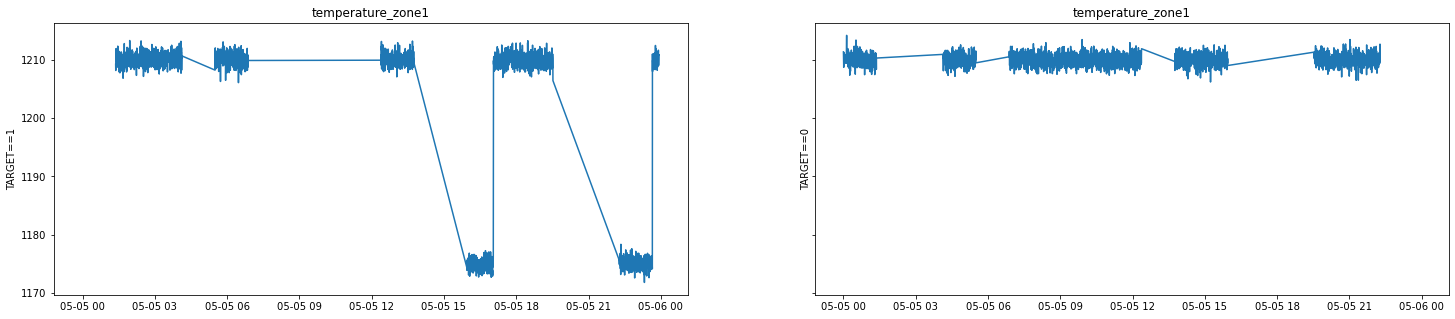

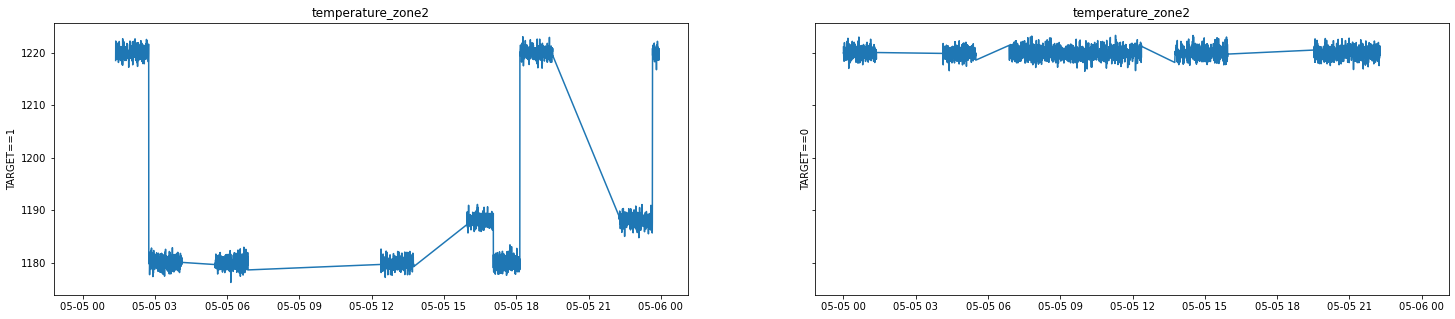

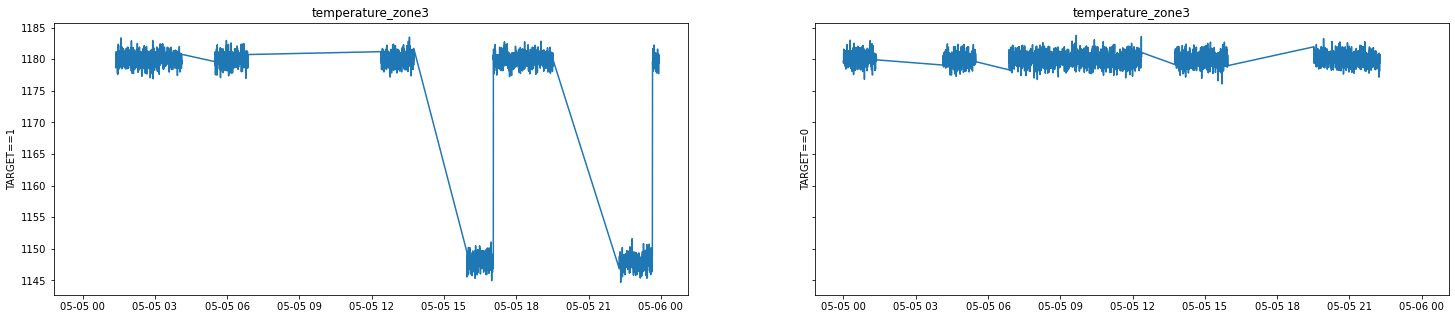

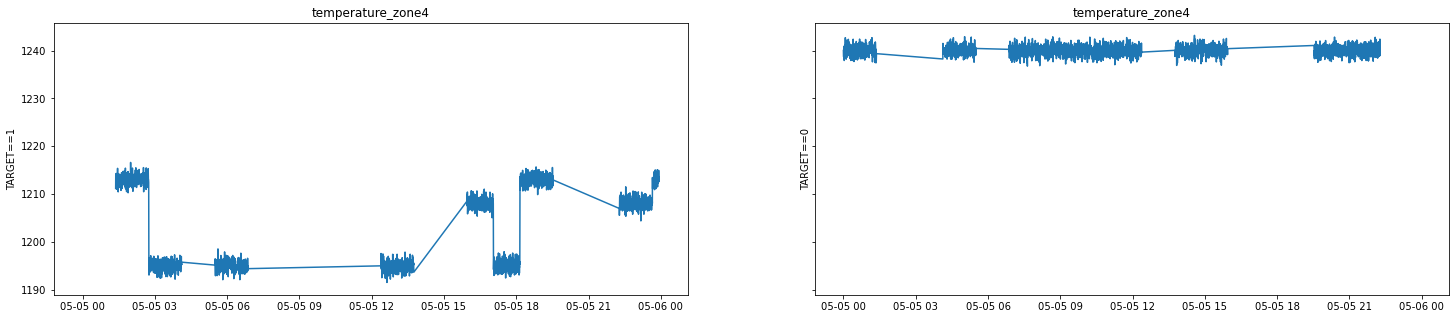

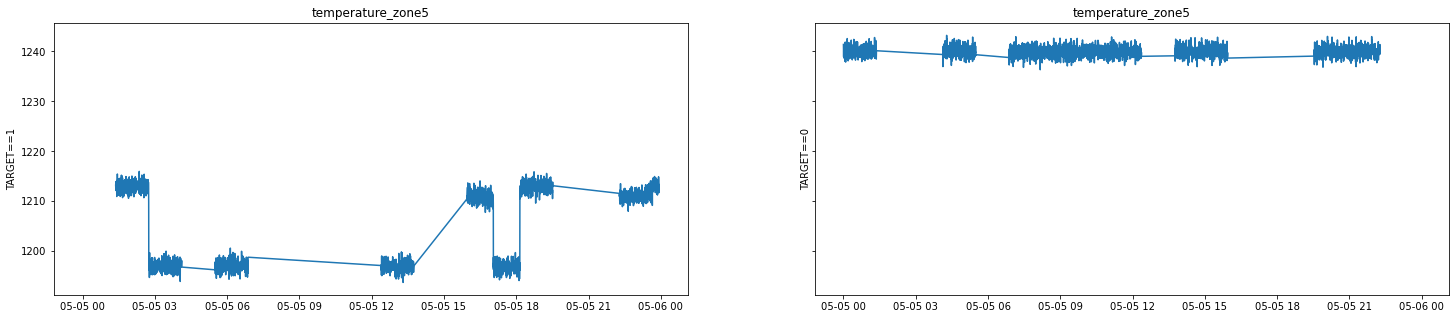

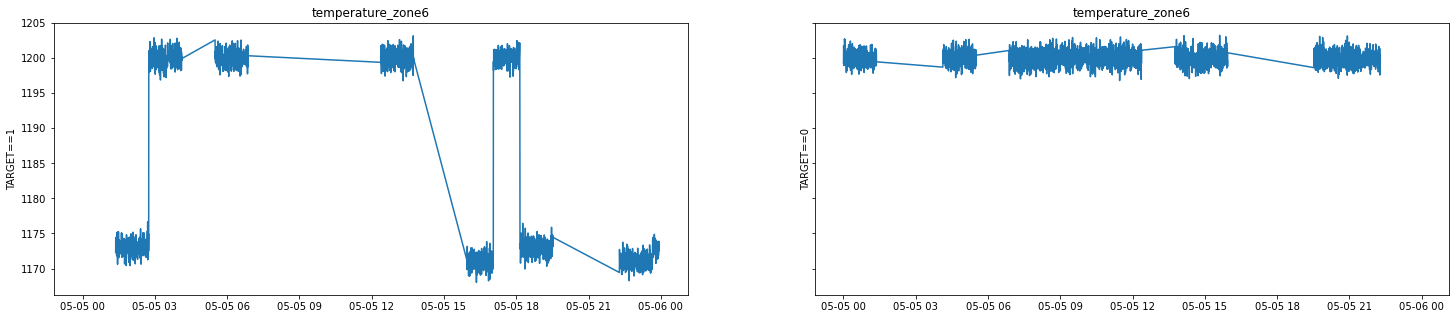

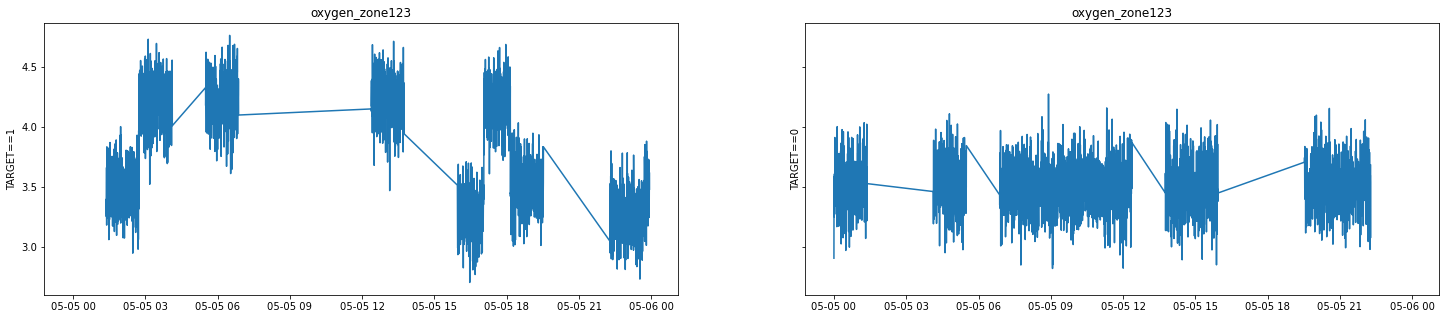

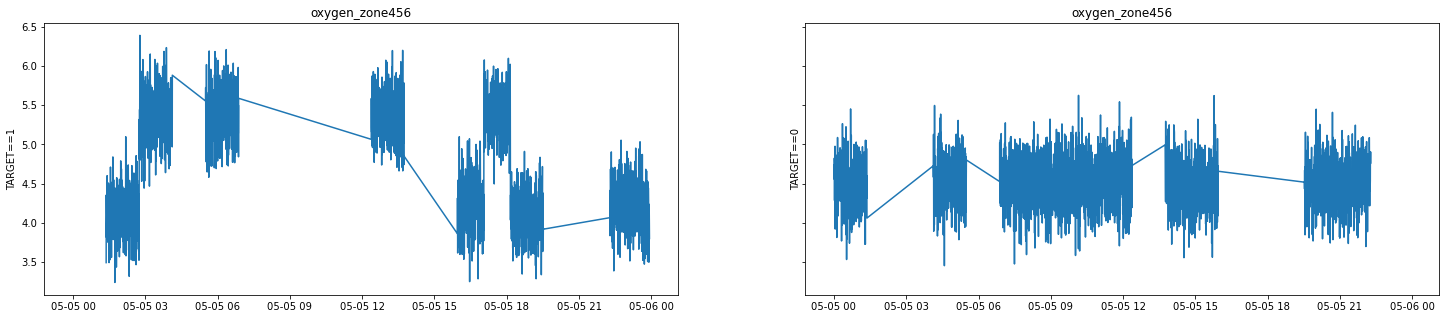

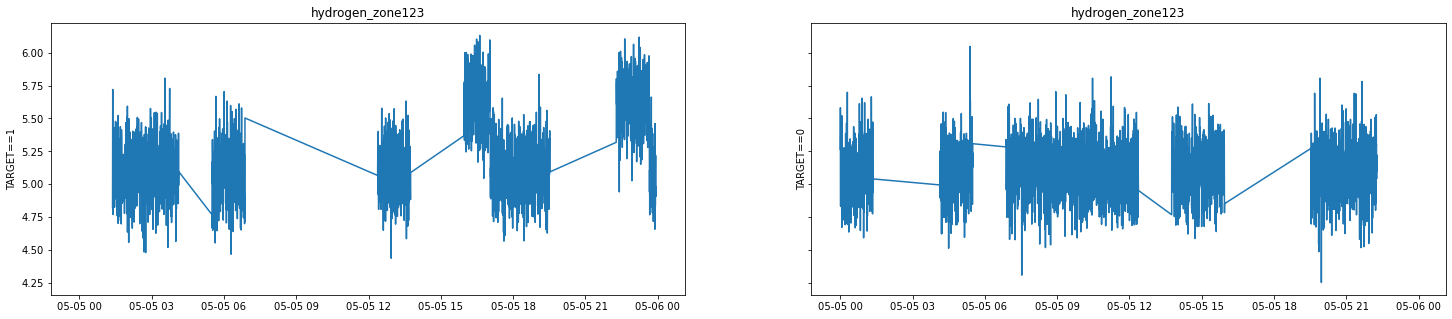

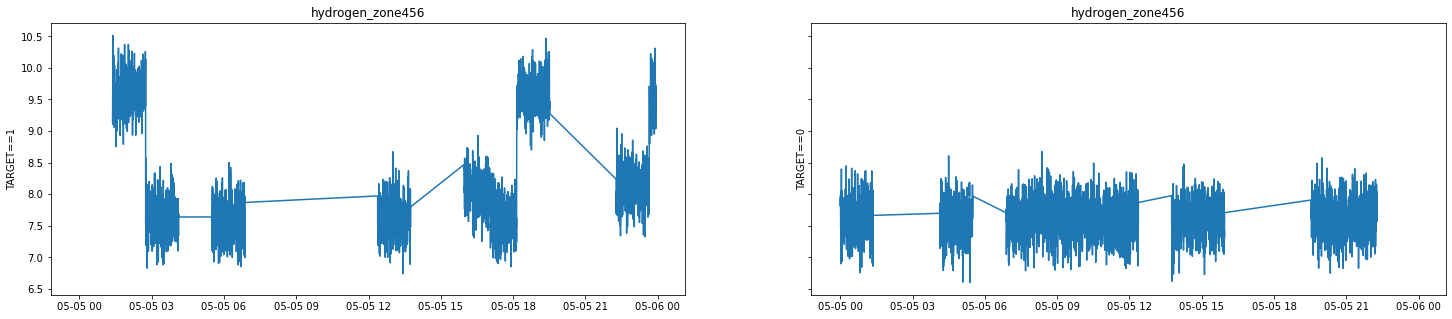

In [40]:
# Plot setpoint features vs timestamp when target==1 and target==0
plt.rcParams["figure.figsize"] = (25, 5)

for idx, col in enumerate(setpoint_cols):

    fig, ax = plt.subplots(1, 2, sharex=True, sharey=True)

    ax[0].plot(target_1_df.index, target_1_df[col])
    ax[0].set_ylabel(target_col + '==1')
    ax[0].set_title(col)

    ax[1].plot(target_0_df.index, target_0_df[col])
    ax[1].set_ylabel(target_col + '==0')
    ax[1].set_title(col)




In [41]:
# Build sklearn logistic regression model with l1 regularization
x_cols = setpoint_cols + context_cols # TODO: Try approach with only setpoint columns
X = df.loc[:, df.columns.isin(x_cols)] # all columns without target
X.head()


,selenium,carbon,manganese,silicium,dinitrogen,temperature_zone1,temperature_zone2,temperature_zone3,temperature_zone4,temperature_zone5,temperature_zone6,oxygen_zone123,oxygen_zone456,hydrogen_zone123,hydrogen_zone456
Timestamp,,,,,,,,,,,,,,,
2022-05-05 00:00:00,0.598,0.0415,0.1598,31.097,76,1211.343319,1221.089337,1179.652435,1240.006479,1241.398137,1199.302872,2.906495,4.738462,5.265036,7.978662
2022-05-05 00:00:15,0.598,0.0415,0.1598,31.097,76,1210.487065,1219.840389,1179.382949,1239.457432,1239.801720,1199.835677,3.586404,4.650469,5.581694,7.811047
2022-05-05 00:00:30,0.598,0.0415,0.1598,31.097,76,1209.258398,1220.108923,1181.212523,1238.697541,1238.942287,1201.755405,3.400140,4.557777,5.093743,7.937647
2022-05-05 00:00:45,0.598,0.0415,0.1598,31.097,76,1208.694874,1218.519837,1181.607433,1240.316758,1240.126988,1201.298739,3.250358,4.636883,4.832298,7.690237
2022-05-05 00:01:00,0.598,0.0415,0.1598,31.097,76,1211.225541,1218.464421,1180.833678,1239.269464,1238.688106,1199.764054,3.505824,4.824536,5.354848,7.451583


In [42]:
y = df[target_col]

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [44]:
# Create a scaler object
sc = StandardScaler()

# Fit the scaler to the training data and transform
X_train_std = sc.fit_transform(X_train)

# Apply the scaler to the test data
X_test_std = sc.transform(X_test)


In [45]:
# Try to use different coefficients
C = [10, 1, .1, .001]

for c in C:
    clf = LogisticRegression(penalty='l1', C=c, solver='liblinear')
    clf.fit(X_train, y_train)
    print('C:', c)
    print('Coefficient of each feature:', clf.coef_)
    print('Training accuracy:', clf.score(X_train_std, y_train))
    print('Test accuracy:', clf.score(X_test_std, y_test))
    print('')

    predictions = clf.predict_proba(X_test_std)
    print('Predictions:')
    print(predictions)


c:\Users\ivano\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


C: 10
Coefficient of each feature: [[ 9.42110730e+01  0.00000000e+00  1.78876862e+02 -8.89754806e-02
   3.89025745e-01 -4.12575512e-03 -5.09477655e-02 -1.59059886e-03
  -6.69085527e-02 -6.11402184e-02 -8.56373491e-03  2.77698978e+00
   1.56167994e+00  4.68237296e+00  4.25308195e+00]]
Training accuracy: 0.49265986563821845
Test accuracy: 0.497968659315148

Predictions:
[[0.00000000e+00 1.00000000e+00]
 [1.00000000e+00 4.86424038e-30]
 [1.00000000e+00 8.16423581e-59]
 ...
 [1.00000000e+00 4.74356533e-55]
 [1.00000000e+00 4.17556810e-57]
 [1.00000000e+00 3.14567855e-63]]


c:\Users\ivano\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


C: 1
Coefficient of each feature: [[ 4.66021853e+01  0.00000000e+00  0.00000000e+00 -1.55097521e-02
   1.14276365e-01  2.81500849e-02 -5.97510874e-02  3.61008220e-02
  -8.93753000e-02 -7.46028039e-02  2.68005189e-02  1.51851411e+00
   1.23284462e+00  6.58087022e+00  4.42165106e+00]]
Training accuracy: 0.4630505100771336
Test accuracy: 0.4631456761462565

Predictions:
[[0.00000000e+00 1.00000000e+00]
 [0.00000000e+00 1.00000000e+00]
 [1.61708432e-05 9.99983829e-01]
 ...
 [2.48462140e-10 1.00000000e+00]
 [2.56775821e-08 9.99999974e-01]
 [2.13158014e-03 9.97868420e-01]]


c:\Users\ivano\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


C: 0.1
Coefficient of each feature: [[ 0.          0.          0.          0.02685266 -0.08396033  0.05499978
  -0.06161898  0.06894895 -0.09703265 -0.07479646  0.06627569  0.
   0.19159984  6.29038079  3.92039326]]
Training accuracy: 0.6869868126399602
Test accuracy: 0.6929773650609402

Predictions:
[[9.99254442e-01 7.45558373e-04]
 [3.76604835e-05 9.99962340e-01]
 [9.96994378e-01 3.00562232e-03]
 ...
 [7.65218466e-03 9.92347815e-01]
 [3.27342116e-01 6.72657884e-01]
 [9.82874950e-01 1.71250499e-02]]
C: 0.001
Coefficient of each feature: [[ 0.          0.          0.          0.05277346  0.          0.04528515
   0.          0.06155236 -0.07257338 -0.04471176  0.01285066  0.
   0.          0.          0.        ]]
Training accuracy: 0.8621547648668824
Test accuracy: 0.8647707486941382

Predictions:
[[0.50188072 0.49811928]
 [0.46669698 0.53330302]
 [0.45873785 0.54126215]
 ...
 [0.46015795 0.53984205]
 [0.4626358  0.5373642 ]
 [0.52974689 0.47025311]]


c:\Users\ivano\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
